<a href="https://colab.research.google.com/github/IsmaelSaid/IsmaelSaid/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient descent**

## **Exemple 1**

---


### $f(x) = x^2 + x + 1 $ 
### $f'(x) = 2x + 1 $ 

our loop run  24
local minimum occurs at: -0.5000014215144014
slope : df(x) -2.8430288028236106e-06
 f(x) 0.7500000000020207


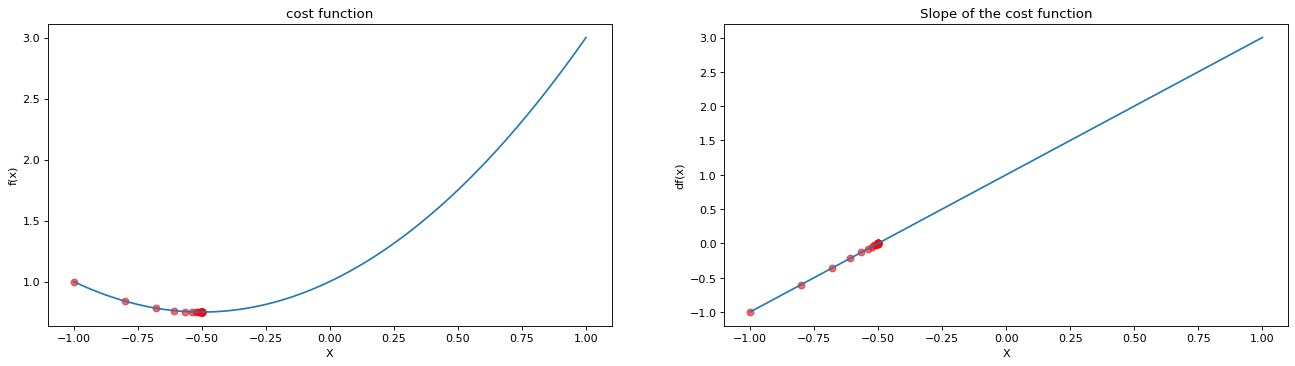

In [ ]:
import sympy as smp 
import numpy as np 


import matplotlib.pyplot as plt 
# line equation : 
def f(x):
  return x**2 + x + 1 
x = smp.symbols('x')
df = smp.lambdify(x,smp.diff(f(x),x))


new_x = -1
previous_x = 0 
step_multiplier = 0.2 
precision = 0.000001 

x_list = [new_x]
slop_list = [df(new_x)]

for n in range(100):
  previous_x = new_x 
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient
  step_size = abs(new_x-previous_x)
  x_list.append(new_x)
  slop_list.append(df(new_x))
  if step_size < precision : 
    print("our loop run ",n)
    break


print('local minimum occurs at:',new_x)
print('slope : df(x)',df(new_x))
print(' f(x)',f(new_x))


# Visualisation 
num_x = np.linspace(-1,1,1000)

plt.figure(figsize=(20, 5), dpi=80)

plt.subplot(1,2,1)
plt.title('cost function')
plt.xlabel("X")
plt.ylabel("f(x)")
plt.plot(num_x,f(num_x))
plt.scatter (x_list,f(np.array(x_list)),color = 'red',alpha = 0.6)


plt.subplot(1,2,2)
plt.title('Slope of the cost function')
plt.xlabel("X")
plt.ylabel("df(x)")
plt.plot(num_x,df(num_x))
plt.scatter (x_list,slop_list,color = 'red',alpha = 0.6)
plt.show()

## **Exemple 2**

---


### $g(x) = x^4 - 4x^2+5$
### $g'(x) = 4x^3 - 8x$

In [ ]:
def g(x):
  return x**4 - 4*x**2 + 5 

def dg(x):
  return 4*x**3 - 8 * x 

In [ ]:
def gradient_descent(derivative_func, initial_guess, learning_rate, precision):
  new_x = initial_guess
  x_list = [new_x]
  slop_list = [derivative_func(new_x)]

  for n in range(500):
    previous_x = new_x 
    gradient = derivative_func(previous_x)
    new_x = previous_x - learning_rate * gradient


    step_size = abs(new_x-previous_x)
    x_list.append(new_x)
    slop_list.append(derivative_func(new_x))
    if step_size < precision :
      break

  return new_x, x_list, slop_list

local_min, list_x, deriv_list = gradient_descent(dg,1, 0.01,0.00001) 
print("local min occurs at ",local_min)
print("Numbers of steps ",len(list_x))
print(deriv_list)


local min occurs at  1.4141687750839818
Numbers of steps  57
[-4, -3.820544, -3.611871903550238, -3.379886330653556, -3.1312232225960956, -2.8727857395850585, -2.611284581018147, -2.3528403221652843, -2.10268759714448, -1.864999736491928, -1.6428315371048257, -1.4381617460756804, -1.2520078051668673, -1.0845833141304055, -0.9354718212694593, -0.8037966338820084, -0.6883732621601055, -0.5878374028207194, -0.5007462756855361, -0.42565445797030677, -0.361167281912115, -0.3059756964048752, -0.2588765923486491, -0.2187822556024841, -0.18472206606235808, -0.15583895665617398, -0.13138257075571858, -0.11070055513897081, -0.09322901382878612, -0.07848282462849099, -0.06604627513823758, -0.055564295340664316, -0.046734436111352196, -0.0392996551591871, -0.0330419137720277, -0.02777655118546818, -0.02334738209910192, -0.019622452087160625, -0.016490381898535134, -0.013857232403703179, -0.011643825453621304, -0.009783460948412426, -0.008219976151707442, -0.00690609919524654, -0.005802054463579509

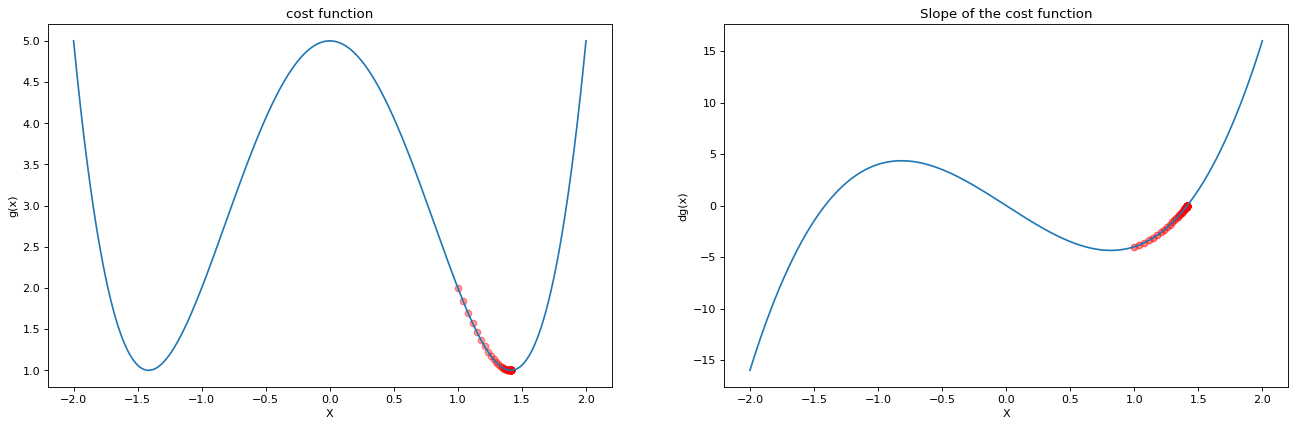

In [ ]:
# Visualisation 
num_x = np.linspace(-2,2,1000)

plt.figure(figsize=(20, 6), dpi=80)

plt.subplot(1,2,1)
plt.title('cost function')
plt.xlabel("X")
plt.ylabel("g(x)")
plt.scatter (list_x,g(np.array(list_x)),color = 'red',alpha = 0.4)

plt.plot(num_x,g(num_x))


plt.subplot(1,2,2)

plt.title('Slope of the cost function')
plt.scatter(list_x,deriv_list,color='red',alpha=0.5)
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.plot(num_x,dg(num_x))
plt.show()


# **Vectorization**

---

**Addition** : two matrices must have an equal number of rows and columns to be added. The result is a matrix with the same number of row and columns.

$
A = \begin{bmatrix}
0 & 1\\
1 & 0 
\end{bmatrix}
$

$
B = \begin{bmatrix}
2 & 1\\
1 & 3 
\end{bmatrix}
$

$ A + B =  \begin{bmatrix}
2 & 2\\
2 & 3 
\end{bmatrix} $


**Produit matriciels de deux matrices**   

$A . B = C$   
A : $m × n$  
B : $n × z$  
Z : $m × z$  

https://www.youtube.com/watch?v=a3wYV2qXcMY&t=236s


In [ ]:
#Addition 

A = np.array([[0,1],[1,0]])
B = np.array([[2,1],[1,3]])
print(A+B)

C = np.ones((3,2))
D = np.ones((3,2))
print(C+D) 

[[2 2]
 [2 3]]
[[2. 2.]
 [2. 2.]
 [2. 2.]]


# **Linear Regression** 

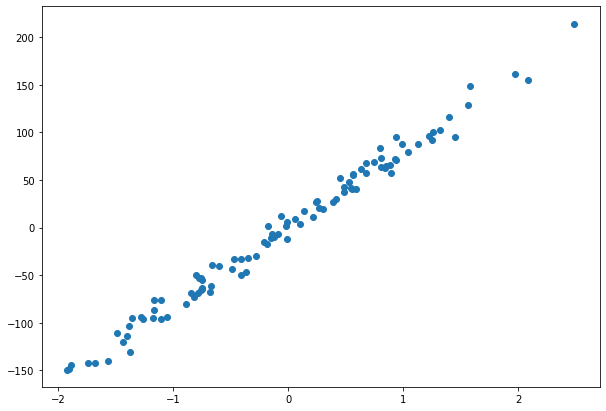

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x,y = make_regression(n_samples = 100, n_features = 1, noise = 10)


plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.show()


In [ ]:
y = y.reshape(y.shape[0],1)
x.shape
y.shape
X = np.hstack((x,np.ones(x.shape)))


In [ ]:
theta = np.random.randn(2,1)
theta

array([[-0.83945027],
       [-0.62125411]])

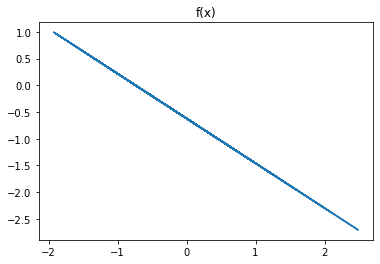

In [ ]:
def model (X,theta): 
  return X.dot(theta)
plt.plot(x,model(X,theta))
plt.title('f(x)')

plt.show()
# x : 100 * 2 | theta : 2 * 1 



In [ ]:
# Fonction cout 
def cost_function(X,y,theta):
  m = len(y)
  return 1/(2*m) * np.sum((model(X,theta)-y)**2)

cost_function(X,y,theta)

3282.4526139526874

In [ ]:
def grad(X,y,theta):
  m = len(y)
  return 1/m * X.T.dot(model(X,theta)-y)

def grad_desc(X,y,theta,learning_rate,n_iterations):
  for i in range(0,n_iterations):
    theta = theta - learning_rate * grad(X,y,theta)
  return theta 

theta_final = grad_desc(X,y,theta,learning_rate = 0.01,n_iterations = 10000)


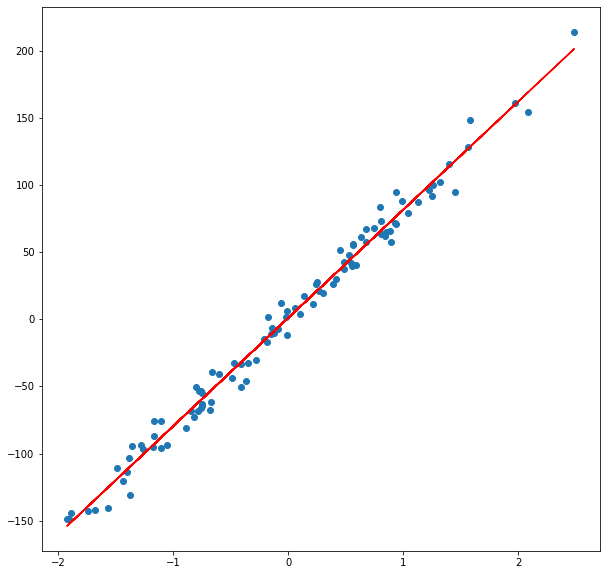

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,model(X,theta_final),color='red')


# **Vectorization**

Given a training set $ \mathcal{D} = \{(x^1 , y^1),(x^2 ,  y^2),...(x^n ,  y^n) \}$ . Create a function $f$


1. **Model :** $H = X . θ$

  $
  X = \begin{bmatrix}
  x^1 && 1\\
  .. && .. \\
  x^n && 1 \\
  \end{bmatrix}
  $

   $
  Y = \begin{bmatrix}
  y^1 \\
  .. \\
  y^n \\
  \end{bmatrix}
  $

  $
  θ = \begin{bmatrix}
  θ_{1}\\
  θ_{2}\\
  \end{bmatrix}
  $

  $H = X.θ = \begin{bmatrix}
  θ_{1}x^1 + θ_{2} \\
  ..\\
 θ_{1}x^1 + θ_{2}\\
  \end{bmatrix} $  

2. **Cost function :**  
  $h_θ(x) = θ_{0} + θ_{1} $  
  $J(θ) = \frac{1}{2n} × \sum_{i=1}^{n} (h_{θ}(x^i) - y^i)^2 $  
  $J(θ_{0},θ_{1}) = \frac{1}{2n} × \sum_{i=1}^{n} (\theta_{0}x^i + \theta_{1} -  y^i)^2 $

  $ \frac{\partial J}{\partial θ_{0}} = \frac{1}{2n} × 2\sum_{i=1}^{n} (\theta_{0}x^i + \theta_{1} -  y^i)  $

2. **Gradient :**


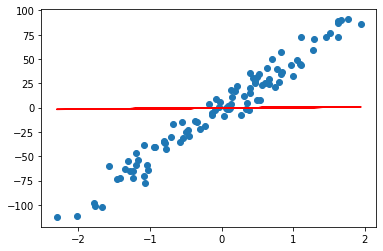

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np 
x,y = make_regression(n_samples = 100, n_features = 1, noise = 10)

y = y.reshape(y.shape[0],1)
X = np.hstack((x,np.ones(x.shape)))

theta = np.random.randn(2,1)


def h(X,theta):
  return X.dot(theta)


def cost_function(X,y,theta):
  n = len(y)
  return (1/n) * np.sum((h(X,theta)-y)**2)


plt.scatter(x,y)
plt.plot(x,h(X,theta),color = 'red')
plt.show()
